In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.interpolate import RegularGridInterpolator

In [2]:
# Open and regrid ETOPO2V2 dataset
NOAA_ETOPO2V2_ds = xr.open_dataset('/home/563/ac9768/GBR/Aus_Bathymetry/ETOPO2v2c_f4.GQp62nWv.nc.part',engine="netcdf4")
NOAA_ETOPO2V2_ds_slice = NOAA_ETOPO2V2_ds.sel(x=slice(140,155),y=slice(-22,-11))
lon = np.linspace(min(NOAA_ETOPO2V2_ds_slice['x'].data), max(NOAA_ETOPO2V2_ds_slice['x'].data), len(NOAA_ETOPO2V2_ds_slice['x'].data))
lat = np.linspace(min(NOAA_ETOPO2V2_ds_slice['y'].data), max(NOAA_ETOPO2V2_ds_slice['y'].data), len(NOAA_ETOPO2V2_ds_slice['y'].data))
lon, lat = np.meshgrid(lon, lat)
topo = NOAA_ETOPO2V2_ds_slice['z'].data

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [3]:
# Open text file with GBR coordinates
GBR_coords_file_path = '/home/563/ac9768/GBR/Aus_Bathymetry/GBR_reef_locations.txt'

# Lists to store latitude and longitude pairs
latitudes = []
longitudes = []

# Open the file and read line by line
with open(GBR_coords_file_path, 'r') as file:
    for line in file:
        # Split each line into latitude and longitude
        values = line.split()
        if len(values) == 2:  # Ensure there are exactly two values on each line
            latitude, longitude = map(float, values)
            latitudes.append(latitude)
            longitudes.append(longitude)

# make an array which lists (lon,lat) reef coordinates
gbr_coordinates = np.column_stack((longitudes,latitudes))

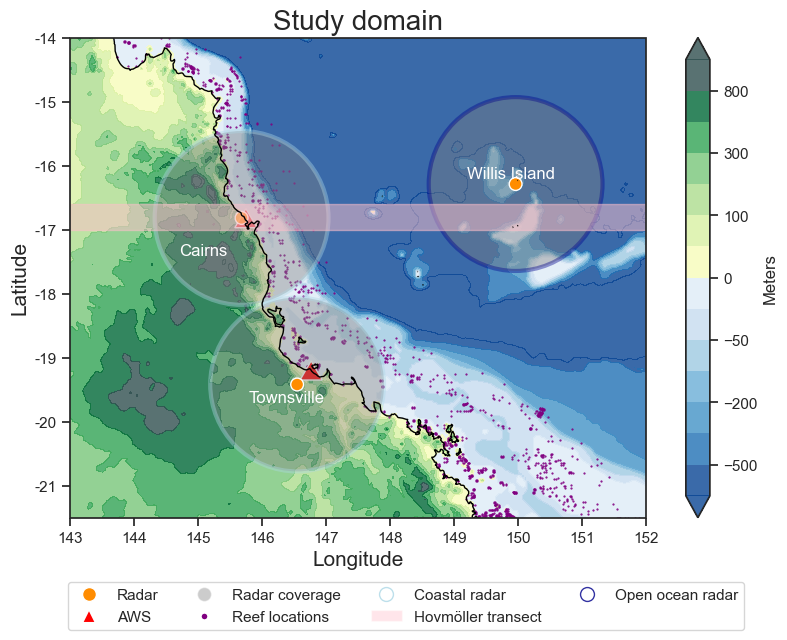

In [35]:
# Plot the study domain

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
sns.set_theme(style="ticks")

ax.set_xlim([143,152])
ax.set_ylim([-21.5,-14])
color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]
cs = ax.contourf(lon,lat,topo,levels=levels,extend="both",colors=color,alpha=0.8)
cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)

# plot gbr locations
ax.scatter(gbr_coordinates[:, 0], gbr_coordinates[:, 1], color='purple', marker='o',s=0.3)

# add station points
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.2,alpha=1,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.2,alpha=1,fc="red",label='AWS location') # Cairns station
ax.add_patch(circle_T_station)
ax.add_patch(circle_C_station) 

# plot radar coverage
circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0.4,fc="grey",ec="lightblue", lw=3) # Townsville
circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.4,fc="grey",ec="lightblue", lw=3) # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.4,fc="grey",ec="darkblue", lw=3) # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)
circle_T_center = mpatches.Circle((146.5509,-19.4198),0.1,alpha=1,fc="darkorange") # Townsville 
circle_C_center = mpatches.Circle((145.683,-16.817),0.1,alpha=0.8,fc="darkorange") # Cairns 
circle_W_center = mpatches.Circle((149.9646,-16.2874),0.1,alpha=1,fc="darkorange",label='Radar location') # Willis Island 
ax.add_patch(circle_T_center)
ax.add_patch(circle_C_center)
ax.add_patch(circle_W_center)

# add rectangle
ax.axhspan(-17,-16.6, color='pink', alpha=0.5)

# other plot details
cb.set_label("Meters")
ax.set_title("Study domain",fontsize=20)
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)

ax.annotate("Townsville",(145.8,-19.7),color='white',fontsize=12)
ax.annotate("Cairns",(144.7,-17.4),color='white',fontsize=12)
ax.annotate("Willis Island",(149.2,-16.2),color='white',fontsize=12)

legend_elements = [
    # Radar location (orange circle)
    Line2D([0], [0],
           marker='o', color='none',
           markeredgecolor='white',
           markerfacecolor='darkorange', 
           markersize=10,
           label='Radar'),
    
    # AWS locations (red triangle)
    Line2D([0], [0],
           marker='^', color='none',
           markeredgecolor='white',
           markeredgewidth=1.5,
           markerfacecolor='red', 
           markersize=10,
           label='AWS'),

    # Radar coverage (grey circle area)
    Line2D([0],[0],
           marker='o', color='none',
           markeredgecolor='white',
           markerfacecolor='grey', 
           markersize=10,
           alpha=0.4,
          label='Radar coverage'),
    
    # Reef locations (purple dots)
    Line2D([0], [0],
           marker='o', color='none',
           markeredgecolor='white',
           markerfacecolor='purple', 
           markersize=5,
           label='Reef locations'),

    # Radar coastal 
    Line2D([0],[0],
           marker='o', color='none',
           markeredgecolor='lightblue',
           markerfacecolor='white', 
           markersize=10,
           alpha=0.8,
          label='Coastal radar'),
    
    # Hovmoller transect (pink shaded area)
    Patch(facecolor='pink', alpha=0.4,
          label='Hovmöller transect'),

    # Radar open ocean
    Line2D([0],[0],
           marker='o', color='none',
           markeredgecolor='darkblue',
           markerfacecolor='white', 
           markersize=10,
           alpha=0.8,
          label='Open ocean radar'),
]

fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=4,
    frameon=True,
    bbox_to_anchor=(0.5, -0.1)
)
fig.savefig(
    "/home/563/ac9768/GBR/scripts/Paper_figures/f01.png",
    bbox_inches="tight",
    dpi=300
)

In [31]:
topo.ndim

2